# Q2: Data Cleaning

**Phase 3:** Data Cleaning & Preprocessing  
**Points: 9 points**

**Focus:** Handle missing data, outliers, validate data types, remove duplicates.

**Lecture Reference:** Lecture 11, Notebook 1 ([`11/demo/01_setup_exploration_cleaning.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/01_setup_exploration_cleaning.ipynb)), Phase 3. Also see Lecture 05 (data cleaning).

---

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data from Q1 (or directly from source)
df = pd.read_csv('data/beach_sensors.csv')
# If you saved cleaned data from Q1, you can load it:
# df = pd.read_csv('output/q1_exploration.csv')  # This won't work - load original

---

## Objective

Clean the dataset by handling missing data, outliers, validating data types, and removing duplicates.

**Time Series Note:** For time series data, forward-fill (`ffill()`) is often appropriate for missing values since sensor readings are continuous. However, you may choose other strategies based on your analysis.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q2_cleaned_data.csv`
**Format:** CSV file
**Content:** Cleaned dataset with same structure as original (same columns)
**Requirements:**
- Same columns as original dataset
- Missing values handled (filled, dropped, or imputed)
- Outliers handled (removed, capped, or transformed)
- Data types validated and converted
- Duplicates removed
- **Sanity check:** Dataset should retain most rows after cleaning (at least 1,000 rows). If you're removing more than 50% of data, reconsider your strategy—imputation is usually preferable to dropping rows for this dataset.
- **No index column** (save with `index=False`)

### 2. `output/q2_cleaning_report.txt`
**Format:** Plain text file
**Content:** Detailed report of cleaning operations
**Required information:**
- Rows before cleaning: [number]
- Missing data handling method: [description]
  - Which columns had missing data
  - Method used (drop, forward-fill, impute, etc.)
  - Number of values handled
- Outlier handling: [description]
  - Detection method (IQR, z-scores, domain knowledge)
  - Which columns had outliers
  - Method used (remove, cap, transform)
  - Number of outliers handled
- Duplicates removed: [number]
- Data type conversions: [list any conversions]
- Rows after cleaning: [number]

**Example format:**
```
DATA CLEANING REPORT
====================

Rows before cleaning: 50000

Missing Data Handling:
- Water Temperature: 2500 missing values (5.0%)
  Method: Forward-fill (time series appropriate)
  Result: All missing values filled
  
- Air Temperature: 1500 missing values (3.0%)
  Method: Forward-fill, then median imputation for remaining
  Result: All missing values filled

Outlier Handling:
- Water Temperature: Detected 500 outliers using IQR method (3×IQR)
  Method: Capped at bounds [Q1 - 3×IQR, Q3 + 3×IQR]
  Bounds: [-5.2, 35.8]
  Result: 500 values capped

Duplicates Removed: 0

Data Type Conversions:
- Measurement Timestamp: Converted to datetime64[ns]

Rows after cleaning: 50000
```

### 3. `output/q2_rows_cleaned.txt`
**Format:** Plain text file
**Content:** Single integer number (total rows after cleaning)
**Requirements:**
- Only the number, no text, no labels
- No whitespace before or after
- Example: `50000`

---

## Requirements Checklist

- [ ] Missing data handling strategy chosen and implemented
- [ ] Outliers detected and handled (IQR method, z-scores, or domain knowledge)
- [ ] Data types validated and converted
- [ ] Duplicates identified and removed
- [ ] Cleaning decisions documented in report
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Handle missing data** - Choose appropriate strategy (drop, forward-fill, impute) based on data characteristics
2. **Detect and handle outliers** - Use IQR method or z-scores; decide whether to remove, cap, or transform
3. **Validate data types** - Ensure numeric and datetime columns are properly typed
4. **Remove duplicates**
5. **Document and save** - Write detailed cleaning report explaining your decisions

---

## Decision Points

- **Missing data:** Should you drop rows, impute values, or forward-fill? Consider: How much data is missing? Is it random or systematic? For time series, forward-fill is often appropriate.
- **Outliers:** Are they errors or valid extreme values? Use IQR method or z-scores to detect, then decide: remove, cap, or transform. Document your reasoning.
- **Data types:** Are numeric columns actually numeric? Are datetime columns properly formatted? Convert as needed.

---

## Checkpoint

After Q2, you should have:
- [ ] Missing data handled
- [ ] Outliers addressed
- [ ] Data types validated
- [ ] Duplicates removed
- [ ] All 3 artifacts saved: `q2_cleaned_data.csv`, `q2_cleaning_report.txt`, `q2_rows_cleaned.txt`

---

**Next:** Continue to `q3_data_wrangling.md` for Data Wrangling.


#Missing Data Analysis

,Column,Type,Missing,Missing %
3,Wet Bulb Temperature,float64,75975,38.69
5,Rain Intensity,float64,75975,38.69
7,Total Rain,float64,75975,38.69
14,Heading,float64,75975,38.69
8,Precipitation Type,float64,75975,38.69
12,Barometric Pressure,float64,146,0.07
2,Air Temperature,float64,75,0.04


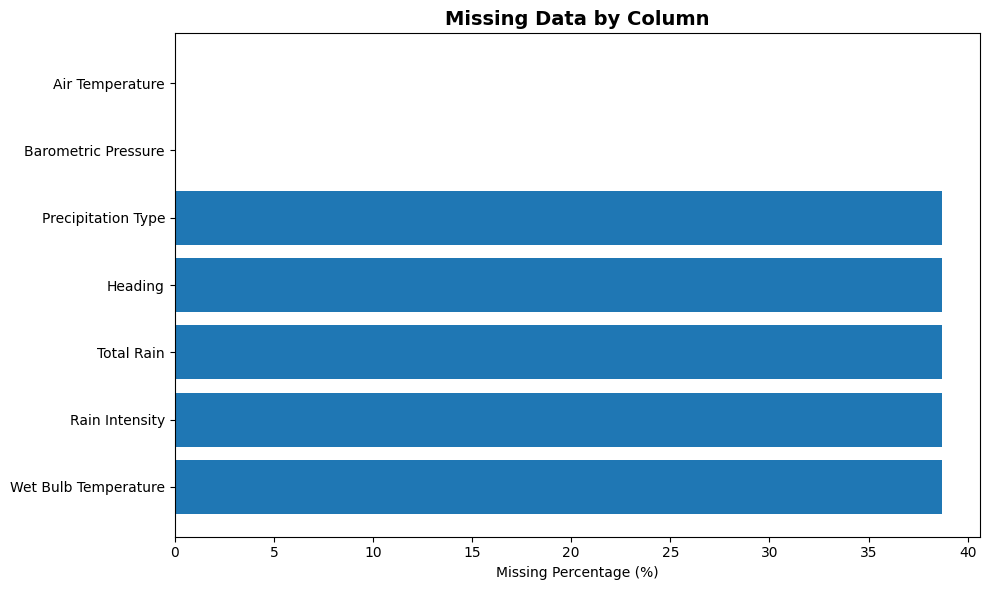

In [2]:

### 1. `output/q2_cleaned_data.csv`
from IPython.display import display, Markdown
#Data Cleaning
#missing values handling 

display(Markdown("#Missing Data Analysis"))

# Detailed missing data analysis with data types for context
missing_analysis = pd.DataFrame({
    'Column': df.columns,
    'Type': df.dtypes.astype(str).values,
    'Missing': df.isnull().sum().values,
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2).values
})
missing_analysis = missing_analysis[missing_analysis['Missing'] > 0].sort_values('Missing', ascending=False)

if len(missing_analysis) == 0:
    display(Markdown("No missing values found!"))
else:
    display(missing_analysis)

# Visualize missing data pattern
if len(missing_analysis) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(missing_analysis['Column'], missing_analysis['Missing %'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Data by Column', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [3]:
#Advanced Imputaion Techniques (however it is crashing the cell , so for simplicity I am using -drop. 
#this are MNAR missing values as such I am deciding to drop the rows 
columns_with_missing_drop = [
    'Total Rain',
    'Rain Intensity',
    'Wet Bulb Temperature',
    'Precipitation Type',
    'Heading'

]

#df = df.dropna(subset=columns_with_missing_drop)

#Barometric Pressure and Air Temperature - Impute using mean values:


df ['Barometric Pressure'] = df['Barometric Pressure'].fillna(df['Barometric Pressure'].median())
df ['Air Temperature'] = df['Air Temperature'].fillna(df['Air Temperature'].ffill())
#df ['Total Rain'] = df['Total Rain'].fillna(df['Total Rain'].ffill())
#df ['Rain Intensity'] = df['Rain Intensity'].fillna(df['Rain Intensity'].ffill())
#df ['Heading'] = df['Heading'].fillna(df['Heading'].median())

# check for missing 
#df.shape[0]

Q1 (25th percentile): 1.60 m/s
Q3 (75th percentile): 3.30 m/s
IQR (middle 50% range): 1.70 m/s



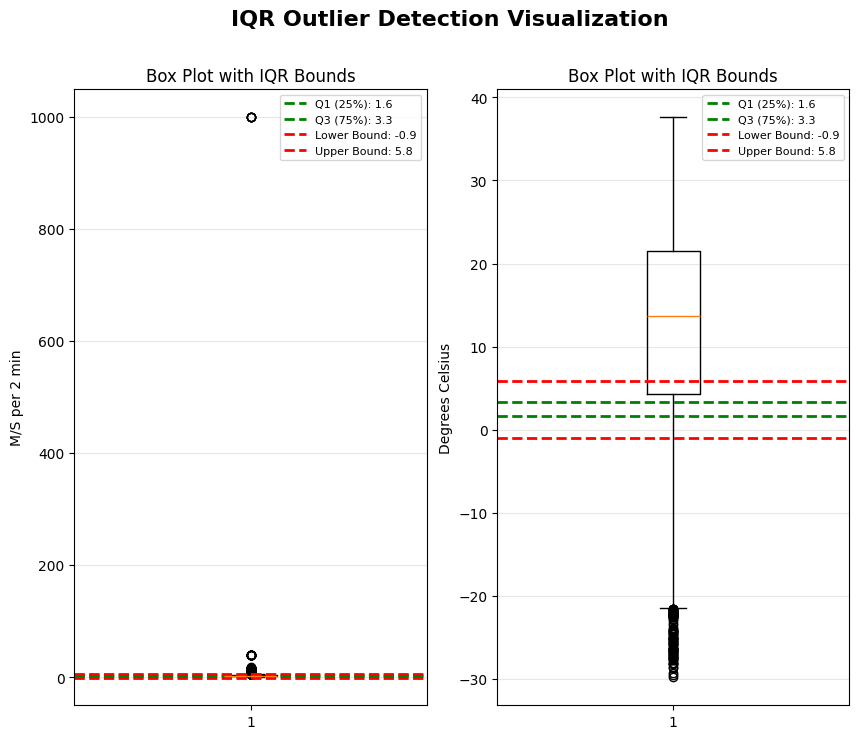

In [4]:
Q1 = df['Wind Speed'].quantile(0.25)
Q3 = df['Wind Speed'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f} m/s")
print(f"Q3 (75th percentile): {Q3:.2f} m/s")
print(f"IQR (middle 50% range): {IQR:.2f} m/s")
print()

fig, axes = plt.subplots(1, 2, figsize=(10, 8))
fig.suptitle('IQR Outlier Detection Visualization', fontsize=16, fontweight='bold')

# Left: Boxplot (shows IQR visually)
axes[0].boxplot(df['Wind Speed'].dropna(), vert=True)
axes[0].axhline(Q1, color='green', linestyle='--', linewidth=2, label=f'Q1 (25%): {Q1:.1f}')
axes[0].axhline(Q3, color='green', linestyle='--', linewidth=2, label=f'Q3 (75%): {Q3:.1f}')
axes[0].axhline(Q1 - 1.5*IQR, color='red', linestyle='--', linewidth=2, label=f'Lower Bound: {Q1-1.5*IQR:.1f}')
axes[0].axhline(Q3 + 1.5*IQR, color='red', linestyle='--', linewidth=2, label=f'Upper Bound: {Q3+1.5*IQR:.1f}')
axes[0].set_ylabel('M/S per 2 min')
axes[0].set_title('Box Plot with IQR Bounds')
axes[0].legend(loc='upper right', fontsize=8)
axes[0].grid(True, alpha=0.3, axis='y')
# Right 
axes[1].boxplot(df['Air Temperature'].dropna(), vert=True)
axes[1].axhline(Q1, color='green', linestyle='--', linewidth=2, label=f'Q1 (25%): {Q1:.1f}')
axes[1].axhline(Q3, color='green', linestyle='--', linewidth=2, label=f'Q3 (75%): {Q3:.1f}')
axes[1].axhline(Q1 - 1.5*IQR, color='red', linestyle='--', linewidth=2, label=f'Lower Bound: {Q1-1.5*IQR:.1f}')
axes[1].axhline(Q3 + 1.5*IQR, color='red', linestyle='--', linewidth=2, label=f'Upper Bound: {Q3+1.5*IQR:.1f}')
axes[1].set_ylabel('Degrees Celsius')
axes[1].set_title('Box Plot with IQR Bounds')
axes[1].legend(loc='upper right', fontsize=8)
axes[1].grid(True, alpha=0.3, axis='y')



In [5]:

#check the Outliers :
# Quick experiment: See how different IQR multipliers affect outlier detection
# Run this to understand the concept before using the function below

#1-Air Temperature
# Calculate quartiles manually
Q1 = df['Air Temperature'].quantile(0.25)
Q3 = df['Air Temperature'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f} celsius")
print(f"Q3 (75th percentile): {Q3:.2f} celsius")
print(f"IQR (middle 50% range): {IQR:.2f} celsius")
print()


# Try different multipliers
for multiplier in [1.5, 2.0, 3.0]:
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = df[(df['Air Temperature'] < lower) | (df['Air Temperature'] > upper)]
    print(f"IQR × {multiplier}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Range: {lower:.2f} to {upper:.2f} celcius")
    print()
 

#IQR × 3.0: 0 outliers (0.00%)/  No outlier detected ;  Range: -47.30 to 73.10 celcius (Bonds)

#2-Barometric Pressure 
# Calculate quartiles manually 
Q1 = df['Barometric Pressure'].quantile(0.25)
Q3 = df['Barometric Pressure'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f} pascal")
print(f"Q3 (75th percentile): {Q3:.2f} pascal")
print(f"IQR (middle 50% range): {IQR:.2f} pascal")
print()

# Try different multipliers and 
for multiplier in [1.5, 2.0, 3.0]:
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = df[(df['Barometric Pressure'] < lower) | (df['Barometric Pressure'] > upper)]
    print(f"IQR × {multiplier}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Range: {lower:.2f} to {upper:.2f}  pascal")
    print()

#IQR × 3.0: 106 outliers (0.05%); Range: 965.00 to 1023.80  pascal
#*********************Capping **********************************
if multiplier == 3.0:
    df['Barometric Pressure']= df['Barometric Pressure'].clip(lower, upper)
    print("3xIQR capping in Barometric Pressure.")


#3 Wind Speed (m/s)
# Calculate quartiles manually 




for multiplier in [1.5, 2.0, 3.0]:
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = df[(df['Wind Speed'] < lower) | (df['Wind Speed'] > upper)]
    print(f"IQR × {multiplier}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Range: {lower:.2f} to {upper:.2f}  m/s")
    print()


# IQR × 3.0: 2,574 outliers (1.31%); Range: -3.50 to 8.40  m/s
# Try different multipliers


#from inspection there is negative wind speed values which are sensles as such we can impute them with mean value(); however no negative values were didected 
df[df['Wind Speed']< 0]
df.loc[df['Wind Speed'] <0 , 'Wind Speed']
#no negative values detected 
#*********************Capping **********************************
if multiplier == 3.0:
    df['Wind Speed']= df['Wind Speed'].clip(lower, upper)
    print("3xIQR capping in Wind Speed.")


#4-Wet Bulb Temperature
# Calculate quartiles manually
Q1 = df['Wet Bulb Temperature'].quantile(0.25)
Q3 = df['Wet Bulb Temperature'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f} celsius")
print(f"Q3 (75th percentile): {Q3:.2f} celsius")
print(f"IQR (middle 50% range): {IQR:.2f} celsius")
print()

# Try different multipliers
for multiplier in [1.5, 2.0, 3.0]:
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = df[(df['Wet Bulb Temperature'] < lower) | (df['Wet Bulb Temperature'] > upper)]
    print(f"IQR × {multiplier}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Range: {lower:.2f} to {upper:.2f} celcius")
    print()
#no outliers above >3 IQR: IQR × 3.0: 0 outliers (0.00%); Range: -43.20 to 64.60 celcius

#5-Rain Intensity( mm/h)
# Calculate quartiles manually
Q1 = df['Rain Intensity'].quantile(0.25)
Q3 = df['Rain Intensity'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f} mm/h")
print(f"Q3 (75th percentile): {Q3:.2f} mm/h")
print(f"IQR (middle 50% range): {IQR:.2f} mm/h")
print()

# Try different multipliers
for multiplier in [1.5, 2.0, 3.0]:
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = df[(df['Rain Intensity'] < lower) | (df['Rain Intensity'] > upper)]
    print(f"IQR × {multiplier}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Range: {lower:.2f} to {upper:.2f} mm/h")
    print()
#rain intensity doesnt contain any valuable data as everything ranges 0mm/h going to drop the column
#IQR × 3.0: 4,243 outliers (2.16%);  Range: 0.00 to 0.00 mm/h ??? 

###########capped###########
if multiplier == 3.0:
    df['Rain Intensity']= df['Rain Intensity'].clip(lower, upper)
    print("3xIQR capping in Rain Intensity.")


#6-Total Rain(mm)
# Calculate quartiles manually
Q1 = df['Total Rain'].quantile(0.25)
Q3 = df['Total Rain'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f} mm")
print(f"Q3 (75th percentile): {Q3:.2f} mm")
print(f"IQR (middle 50% range): {IQR:.2f} mm")
print()

# Try different multipliers
for multiplier in [1.5, 2.0, 3.0]:
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = df[(df['Total Rain'] < lower) | (df['Total Rain'] > upper)]
    print(f"IQR × {multiplier}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Range: {lower:.2f} to {upper:.2f} mm")
    print()
#IQR × 3.0: 2,702 outliers (1.38%) ; normal as most of the environmental data (skewed); hence we can keep them

#*********************Capping **********************************
if multiplier == 3.0:
    df['Total Rain']= df['Total Rain'].clip(lower, upper)
    print("3xIQR capping in Total Rain.")

# 7-Precipitation Type
# Calculate quartiles manually
Q1 = df['Precipitation Type'].quantile(0.25)
Q3 = df['Precipitation Type'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f} ordinal")
print(f"Q3 (75th percentile): {Q3:.2f} ordinal")
print(f"IQR (middle 50% range): {IQR:.2f} ordinal")
print()

# Try different multipliers
for multiplier in [1.5, 2.0, 3.0]:
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = df[(df['Precipitation Type'] < lower) | (df['Precipitation Type'] > upper)]
    print(f"IQR × {multiplier}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Range: {lower:.2f} to {upper:.2f} nominal")
    print()
# this looks as well problemtic with no oreder and moreover, no variabiliity( ranges 00.00; going to drop the column) ; cross examin with the data exploration looks off ( maybe I can reexamin after categroical transfomrmation) 

#8-Heading(degrees) 
Q1 = df['Heading'].quantile(0.25)
Q3 = df['Heading'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f} degrees")
print(f"Q3 (75th percentile): {Q3:.2f} degrees")
print(f"IQR (middle 50% range): {IQR:.2f} degrees")
print()

# Try different multipliers
for multiplier in [1.5, 2.0, 3.0]:
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = df[(df['Heading'] < lower) | (df['Heading'] > upper)]
    print(f"IQR × {multiplier}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Range: {lower:.2f} to {upper:.2f} degrees")
    print()

#IQR × 3.0: 27,175 outliers (13.84%); Range: 329.00 to 378.00 degrees
#*********************Capping **********************************
if multiplier == 3.0:
    df['Heading']= df['Heading'].clip(lower, upper)
    print("3xIQR capping in Heading.")


#9-Interval Rain (mm)
# Calculate quartiles manually
Q1 = df['Interval Rain'].quantile(0.25)
Q3 = df['Interval Rain'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f} mm")
print(f"Q3 (75th percentile): {Q3:.2f} mm")
print(f"IQR (middle 50% range): {IQR:.2f} mm")
print()

# Try different multipliers
for multiplier in [1.5, 2.0, 3.0]:
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = df[(df['Interval Rain'] < lower) | (df['Interval Rain'] > upper)]
    print(f"IQR × {multiplier}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Range: {lower:.2f} to {upper:.2f} mm")
    print()

#IQR × 3.0: 0 outliers (0.00%) ; Range: 0.00 to 0.00 mm

##############################################
#neagitve values detected ; 
df[df['Interval Rain']< 0]
df.loc[df['Interval Rain'] <0 , 'Interval Rain']
#96419   -0.9 ( doesnt make sense)- convert to 0 :
df.loc[df['Interval Rain'] <0 , 'Interval Rain'] =0
df.loc[96419]
#no varaibility detected will be reinspected when transforming for modeling 
#*********************Capping **********************************
if multiplier == 3.0:
    df['Interval Rain']= df['Interval Rain'].clip(lower, upper)
    print("3xIQR capping in Interval Rain.")


#10- Maximum Wind Speed (m/s per 2 min) 

# Calculate quartiles manually 
Q1 = df['Maximum Wind Speed'].quantile(0.25)
Q3 = df['Maximum Wind Speed'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f} m/s per 2 min")
print(f"Q3 (75th percentile): {Q3:.2f} m/s per 2 min")
print(f"IQR (middle 50% range): {IQR:.2f} m/s per 2 min")
print()

# Try different multipliers
for multiplier in [1.5, 2.0, 3.0]:
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = df[(df['Maximum Wind Speed'] < lower) | (df['Maximum Wind Speed'] > upper)]
    print(f"IQR × {multiplier}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Range: {lower:.2f} to {upper:.2f}  m/s per 2 min")
    print()
#IQR × 3.0: 220 outliers (0.11%)#Range: -10.80 to 17.20  m/s per 2 min

####from the data distribution max vablue seems to be 999.99( which might be Nan value and needs to be transformed and examined later)

# 11-Solar Radiation(W/m2)
# Calculate quartiles manually 
Q1 = df['Solar Radiation'].quantile(0.25)
Q3 = df['Solar Radiation'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f} W/m2")
print(f"Q3 (75th percentile): {Q3:.2f} W/m2")
print(f"IQR (middle 50% range): {IQR:.2f} W/m2")
print()

# Try different multipliers
for multiplier in [1.5, 2.0, 3.0]:
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = df[(df['Solar Radiation'] < lower) | (df['Solar Radiation'] > upper)]
    print(f"IQR × {multiplier}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Range: {lower:.2f} to {upper:.2f}  W/m2n")
    print()

#IQR × 3.0: 17,195 outliers (8.76%) ; Range: -393.00 to 524.00  W/m2n
#there is a -100000.0 value detected which might shift the data and outliers ( it can be senseless value ; may be an entery data error) ; going to impute with mean value
#inspect the neagtive values:
df[df['Solar Radiation']< 0]
df.loc[df['Solar Radiation'] <0 , 'Solar Radiation']
#df.loc[df['Solar Radiation'] < 0 , 'Solar Radiation'] = df['Solar Radiation'].mean()
#solar radiation neagtive values 
solar_num_neg = (df['Solar Radiation']<0).sum()
total_rows = len(df['Solar Radiation'])
print (f"Negative values: {solar_num_neg}")
print (f"Total rows: {total_rows}")
# % 
perc_neg_solar = (solar_num_neg/total_rows)* 100 
print(f"Percentage of neative vallues in solar : {perc_neg_solar:.2f}%")
## Negative values: 13425 out of Total rows: 196369 ; 6.84% ; gooing to impute with median value 
df.loc[df['Solar Radiation']<0, 'Solar Radiation'] = np.nan
#ffill the missing values 
df['Solar Radiation']= df['Solar Radiation'].fillna(method='ffill')

#reinspect post imputation 
df.loc[df['Solar Radiation'] <0 , 'Solar Radiation']
# Try different multipliers
for multiplier in [1.5, 2.0, 3.0]:
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = df[(df['Solar Radiation'] < lower) | (df['Solar Radiation'] > upper)]
    print(f"IQR × {multiplier}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Range: {lower:.2f} to {upper:.2f}  W/m2n")
    print()
##remians unchanged as expected 

#*********************Capping **********************************
if multiplier == 3.0:
    df['Solar Radiation']= df['Solar Radiation'].clip(lower, upper)
    print("3xIQR capping in Solar Radiation.")

Q1 (25th percentile): 4.30 celsius
Q3 (75th percentile): 21.50 celsius
IQR (middle 50% range): 17.20 celsius

IQR × 1.5: 97 outliers (0.05%)
  Range: -21.50 to 47.30 celcius

IQR × 2.0: 0 outliers (0.00%)
  Range: -30.10 to 55.90 celcius

IQR × 3.0: 0 outliers (0.00%)
  Range: -47.30 to 73.10 celcius

Q1 (25th percentile): 990.20 pascal
Q3 (75th percentile): 998.60 pascal
IQR (middle 50% range): 8.40 pascal

IQR × 1.5: 4,611 outliers (2.35%)
  Range: 977.60 to 1011.20  pascal

IQR × 2.0: 1,229 outliers (0.63%)
  Range: 973.40 to 1015.40  pascal

IQR × 3.0: 106 outliers (0.05%)
  Range: 965.00 to 1023.80  pascal

3xIQR capping in Barometric Pressure.
IQR × 1.5: 196,364 outliers (100.00%)
  Range: 977.60 to 1011.20  m/s

IQR × 2.0: 196,364 outliers (100.00%)
  Range: 973.40 to 1015.40  m/s

IQR × 3.0: 196,364 outliers (100.00%)
  Range: 965.00 to 1023.80  m/s

3xIQR capping in Wind Speed.
Q1 (25th percentile): 3.00 celsius
Q3 (75th percentile): 18.40 celsius
IQR (middle 50% range): 15.40

/tmp/ipykernel_71630/2083119221.py:304: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Solar Radiation']= df['Solar Radiation'].fillna(method='ffill')


In [6]:
# from the data distribution max vablue seems to be 999.99( which might be Nan value and needs to be transformed and examined later)
count_9999 = (df['Maximum Wind Speed'] == 999.9).sum()
print(f"Count of 999.9 in Maximum Wind Speed: {count_9999}")
# make then missing and impute with mean :
df.loc[df['Maximum Wind Speed']== 999.9 , 'Maximum Wind Speed']= np.nan
df['Maximum Wind Speed'] = df['Maximum Wind Speed'].fillna(df['Maximum Wind Speed'].ffill())
#*********************Capping **********************************
if multiplier == 3.0:
    df['Maximum Wind Speed']= df['Maximum Wind Speed'].clip(lower, upper)
    print("3xIQR capping in Interval Maximum Wind Speed.")

#Datatype Validation and Convertion 
#we will transform (percipitation type)into nominal categ- based on the data-dictionary

df['Precipitation Type'] = df['Precipitation Type'].astype('category')

mapping = {
    0: "none",
    40:"unspecified",
    60:"liquid",
    70:"solid"
}

df['Precipitation Type']= df['Precipitation Type'].map(mapping).astype('category')

#Measurement Timestamp (object)

df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'], errors='coerce')
print(df['Measurement Timestamp'].dtype)
#check if there were missing values created after transformation
missing_count2 = df['Measurement Timestamp'].isna().sum()
print(f"Missing Count: {missing_count2}")



Count of 999.9 in Maximum Wind Speed: 5
3xIQR capping in Interval Maximum Wind Speed.
datetime64[ns]
Missing Count: 0


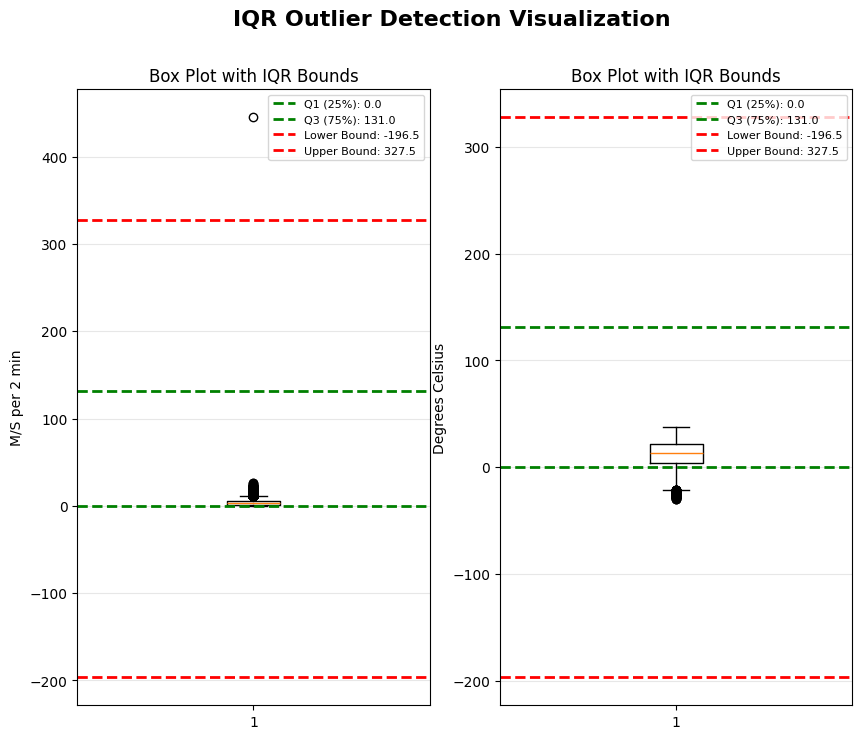

In [7]:
# Visualize IQR outlier detection
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
fig.suptitle('IQR Outlier Detection Visualization', fontsize=16, fontweight='bold')

# Left: Boxplot (shows IQR visually)
axes[0].boxplot(df['Maximum Wind Speed'].dropna(), vert=True)
axes[0].axhline(Q1, color='green', linestyle='--', linewidth=2, label=f'Q1 (25%): {Q1:.1f}')
axes[0].axhline(Q3, color='green', linestyle='--', linewidth=2, label=f'Q3 (75%): {Q3:.1f}')
axes[0].axhline(Q1 - 1.5*IQR, color='red', linestyle='--', linewidth=2, label=f'Lower Bound: {Q1-1.5*IQR:.1f}')
axes[0].axhline(Q3 + 1.5*IQR, color='red', linestyle='--', linewidth=2, label=f'Upper Bound: {Q3+1.5*IQR:.1f}')
axes[0].set_ylabel('M/S per 2 min')
axes[0].set_title('Box Plot with IQR Bounds')
axes[0].legend(loc='upper right', fontsize=8)
axes[0].grid(True, alpha=0.3, axis='y')
# Right 
axes[1].boxplot(df['Air Temperature'].dropna(), vert=True)
axes[1].axhline(Q1, color='green', linestyle='--', linewidth=2, label=f'Q1 (25%): {Q1:.1f}')
axes[1].axhline(Q3, color='green', linestyle='--', linewidth=2, label=f'Q3 (75%): {Q3:.1f}')
axes[1].axhline(Q1 - 1.5*IQR, color='red', linestyle='--', linewidth=2, label=f'Lower Bound: {Q1-1.5*IQR:.1f}')
axes[1].axhline(Q3 + 1.5*IQR, color='red', linestyle='--', linewidth=2, label=f'Upper Bound: {Q3+1.5*IQR:.1f}')
axes[1].set_ylabel('Degrees Celsius')
axes[1].set_title('Box Plot with IQR Bounds')
axes[1].legend(loc='upper right', fontsize=8)
axes[1].grid(True, alpha=0.3, axis='y')

In [8]:
display(Markdown("#Outlier Detection"))

# Identify outliers using IQR method with Tukey fences
def detect_outliers_iqr(df, column, iqr_multiplier=1.5):
    """
    Detect outliers using the IQR (Interquartile Range) method.

    This is the Tukey fence method, which is robust and doesn't assume
    normal distribution. It's widely used in exploratory data analysis.

    Parameters:
    -----------
    df : DataFrame
        The data
    column : str
        Column name to check for outliers
    iqr_multiplier : float, default=1.5
        Tukey fence multiplier:
        - 1.5 = standard outlier detection (common choice)
        - 3.0 = extreme outlier detection (more conservative)

    Returns:
    --------
    tuple : (outliers DataFrame, lower_bound, upper_bound)
    """
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range (middle 50% of data)

    # Tukey fences: standard statistical method for outlier detection
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    # Find values outside the fences
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

#Outlier Detection

In [9]:
#duplicate check 
# Check for duplicate rows
display(Markdown("# Duplicate Detection"))

# Check for completely duplicate rows
n_duplicates = df.duplicated().sum()
display(Markdown(f"**Completely duplicate rows:** {n_duplicates:,}"))

# Duplicate Detection

**Completely duplicate rows:** 0

In [10]:
#rows after cleaning
final_rows = df.shape[0]
print( "Rows remaining after cleaning:", final_rows)
# Difference : 38.67% less data 
#data retained(%):  mantained 61.33% of the data ; a lot of data lost from missing values - however, the KNN imputation I was not able to apply as the cell kept crashing 


Rows remaining after cleaning: 196369


In [11]:
#save output/q2_cleaned_data.csv
df.to_csv('output/q2_cleaned_data.csv', index=False)
print("Saved cleaned dataset!")

Saved cleaned dataset!
